In [61]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [4]:
data = pd.read_csv("./test results/test_1/3000.csv", converters={'Datetime': str.strip, 'Transaction ID': str.strip, 'Status': str.strip})

In [6]:
# Preview data
data.head()

,Datetime,Transaction ID,Status
0,04-12-2019 17:53:50.883799353,521f719ff72d265d8c78a8a7a704ec2d982eaa37d21994...,REQ
1,04-12-2019 17:53:50.884362018,521f719ff72d265d8c78a8a7a704ec2d982eaa37d21994...,INIT
2,04-12-2019 17:53:50.967560050,521f719ff72d265d8c78a8a7a704ec2d982eaa37d21994...,ACC
3,04-12-2019 17:53:54.884842708,91a7cc06721ddd14329229c200f9222322de3328b17ee1...,REQ
4,04-12-2019 17:53:54.885425549,91a7cc06721ddd14329229c200f9222322de3328b17ee1...,INIT


In [23]:
status = data["Status"].unique()
history = {}
for i in status:
    history[i] = {}
print(history)

{'REQ': {}, 'INIT': {}, 'ACC': {}}


In [25]:
for key,rows in data.iterrows():
    history[rows["Status"]][rows["Transaction ID"]] = rows["Datetime"]    

In [26]:
history

{'REQ': {'521f719ff72d265d8c78a8a7a704ec2d982eaa37d21994b376d9606de9e20076': '04-12-2019 17:53:50.883799353',
  '91a7cc06721ddd14329229c200f9222322de3328b17ee19089d706036f6c273d': '04-12-2019 17:53:54.884842708',
  '4f7b6c0c62a047225306f82c2b0fc76dc1bd2398aaba0d2fd718200ef4a765bd': '04-12-2019 17:54:00.885270338',
  '471f554570a37958c788459b9dfc1e8d02a22bedc0fed6739fc121e55994c897': '04-12-2019 17:54:03.886856632',
  '7e77f271086ec731c55c3c8c8abf98c323286b28dc929d6d95d23ed63268363b': '04-12-2019 17:54:08.887685861',
  '4ad0d7bef8f882ebd3ad2955a9c99cf1e1ebb213581b86064fe38530b23231ad': '04-12-2019 17:54:10.887802113',
  'b7ed18bcfb69937be3cbc351555560fdf2350e2a3d3639d97619aa50b2889a60': '04-12-2019 17:54:12.889393917',
  'd4ee13a11aa91e610ad60af3269e622768b6f1dd0692c6c5063d41dc0eaf2849': '04-12-2019 17:54:15.889362572',
  '5725256dfa9464f8f239f303c1c205b955f5cdf8f4e53cb236d6d3d10e40993e': '04-12-2019 17:54:17.889841233',
  'ffe613388c37cbbb5c1144f2e43f509fca9b6a2f124284badc61b3dbbcd0427

In [27]:
for i in status:
    for key,value in history[i].items():
        try: # correct format 
            history[i][key] = datetime.utcnow().strptime(value, "%d-%m-%Y %H:%M:%S.%f")
        except ValueError: # Format in nanoseconds, truncate it
            history[i][key] = datetime.utcnow().strptime(value[:26], "%d-%m-%Y %H:%M:%S.%f")
        except TypeError:
            continue
    # requested[key] = datetime.utcnow().strptime(value[:-3], "%d-%m-%Y %H:%M:%S.%f")

In [47]:
time_from_init = {}
time_from_req = {}
for transactionID, time in history['ACC'].items():
    #print(transactionID)
    req_time = history['REQ'][transactionID]
    init_time = history['INIT'][transactionID]
    time_from_init[transactionID] = (time-init_time).total_seconds()*1000
    time_from_req[transactionID] = (time-req_time).total_seconds()*1000

In [92]:
list_time_from_init = list(time_from_init.values())[1:]
list_time_from_req = list(time_from_req.values())[1:]

In [93]:
def movingaverage(interval, window_size):
    window = numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

NameError: name 'numpy' is not defined

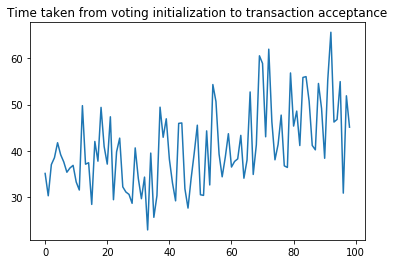

In [97]:
plt.title('Time taken from voting initialization to transaction acceptance')
plt.plot(list_time_from_init)
x_av = movingaverage(list_time_from_init, 10)
plt.plot(x_av)
print("Mean: ",statistics.mean(list_time_from_init)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_init)," ms")

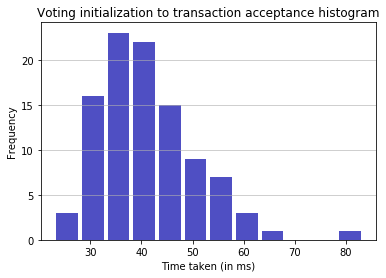

In [85]:
hist, bin_edges = np.histogram(list_time_from_init)
n, bins, patches = plt.hist(x=list_time_from_init, bins='auto', 
                            color='#0504aa', alpha=0.7, rwidth=0.85) # color-related params
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time taken (in ms)')
plt.ylabel('Frequency')
plt.title('Voting initialization to transaction acceptance histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Mean:  41.81557  ms
Standard Deviation:  9.675000848542233  ms


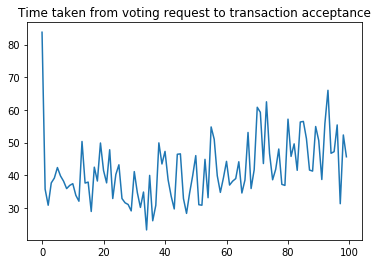

In [88]:
plt.title('Time taken from voting request to transaction acceptance')
plt.plot(list_time_from_req)
print("Mean: ",statistics.mean(list_time_from_req)," ms")
print("Standard Deviation: ",statistics.stdev(list_time_from_req)," ms")

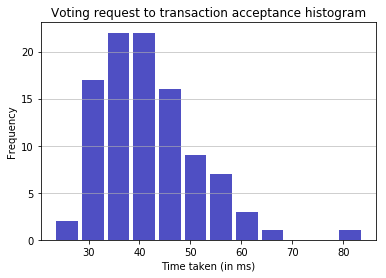

In [89]:
hist, bin_edges = np.histogram(list_time_from_req)
n, bins, patches = plt.hist(x=list_time_from_req, bins='auto', 
                            color='#0504aa', alpha=0.7, rwidth=0.85) # color-related params
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time taken (in ms)')
plt.ylabel('Frequency')
plt.title('Voting request to transaction acceptance histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)